In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import neo.io as ni
import neo as n
import zipfile
from neo.io import Spike2IO
import numpy as np
import inspect
import spikeinterface.full as si
import hdbscan
from probeinterface import generate_linear_probe
from probeinterface import Probe
from probeinterface.plotting import plot_probe
import probeinterface as pi
import spikeinterface.sortingcomponents as sc

The experiment conducted at GIN, showcases how two groups of mouse, one control and other having Parkinsons Disease, show noiceptive response because of the footshock they receive. The first group is control group where the Substantia Niagra reticulate(SNr) has firing rate which is regular and tonic. The second group consists of mice have been injected with OHDA virus which creates dengeracy of neurons of Subtantia Niagra par compacta (SNc), which we observe in the Parkinson disease patients. The second group should show the high volatility in tonic and freeucny of both noiceptive response and optogenetic stimulation recepted by the SNr and consequently we get to see the noiceptive reponse in Superior Calliculus (SC).

Below are the two extracellular recording got from both groups. We use Spike2extractor for both the recording to gather surfacial understanding of the signals and also to run preliminary trials on the signals.  

In [3]:
data_loc = r"D:\GIPSA Labwork Internship\spiekee\Spikeme\sourcedata\520\ieeg\520-06.smr"
data_loc2 = r"D:\GIPSA Labwork Internship\spike_interface_primaries\RAWAT\Spikeme\Spikeme\sourcedata\502\ieeg\502-01.smr"



By default spike2 extractor shows both recorded channels

In [4]:
full_raw_control = si.read_spike2(data_loc)
full_raw_PD = si.read_spike2(data_loc2)

Below are the representations of action potentials found in control and PD mouse. Spike interface has an inbuilt tool to plot the channels. However, to know the amplitudes of the action potentials
found in the recordings we have to take 

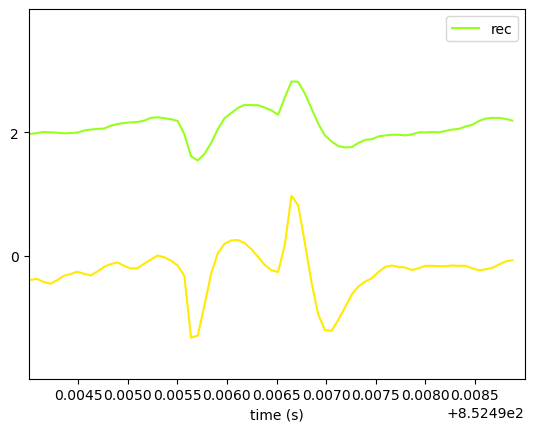

In [4]:

full_raw_control.set_channel_groups(channel_ids=full_raw_control.get_channel_ids(), groups=[0,1])
plot_control = si.plot_traces(full_raw_control, time_range=(852.494, 852.499),mode='line',show_channel_ids=True, color_groups= True)

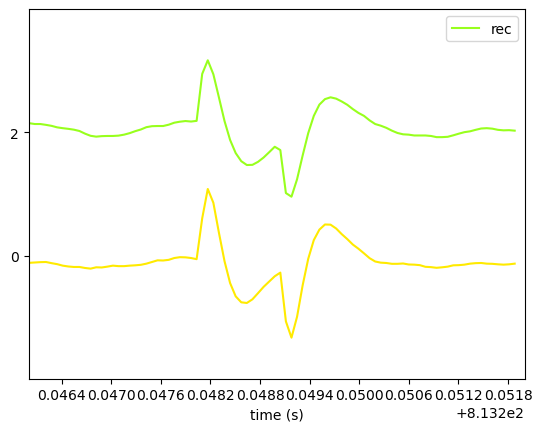

In [5]:
full_raw_PD.set_channel_groups(channel_ids=full_raw_PD.get_channel_ids(), groups=[0,1])
plot_PD = si.plot_traces(full_raw_PD, time_range=(813.246, 813.252),mode='line',show_channel_ids=True, color_groups= True)

An attribute finder which is based on any string character

In [6]:
def attributefinder(recording,strname):
    for attr in dir(recording):
        if strname in attr:
            print(attr)

In [7]:
attributefinder(full_raw_PD,"channel")

_channel_slice
_remove_channels
channel_ids
channel_slice
clear_channel_groups
clear_channel_locations
get_channel_gains
get_channel_groups
get_channel_ids
get_channel_locations
get_channel_offsets
get_channel_property
get_num_channels
has_channel_location
remove_channels
rename_channels
set_channel_gains
set_channel_groups
set_channel_locations
set_channel_offsets


## CED extractor method 


In [8]:
stream_id = "0"

full_raw_PD_ced_1 = si.read_ced(data_loc2,stream_id=stream_id)

ModuleNotFoundError: No module named 'sonpy'

In [ ]:
attributefinder(full_raw_PD_ced_1.neo_reader,"info")

stream_info


In [ ]:
attributefinder(full_raw_PD.select_segments([0]),"frame")


_frame_slice
frame_slice
get_num_frames


In [ ]:
full_raw_PD_ced_1.select_segments([0]).get_time_info()

{'sampling_frequency': 14814.814814814818, 't_start': 0.0, 'time_vector': None}

In [ ]:
channeli_id = full_raw_PD.get_channel_ids()
print(channeli_id)

['0' '2']


In [ ]:
num_channels = full_raw_PD_ced_1.get_num_channels()
print(num_channels)

1


(<matplotlib.collections.PolyCollection at 0x272605b4a00>,
 <matplotlib.collections.PolyCollection at 0x2724d94cee0>)

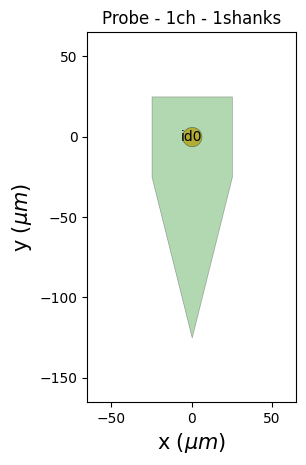

In [ ]:
linear_probe = generate_linear_probe(num_elec=1, ypitch=125)
plot_probe(linear_probe, with_contact_id=True)

In [ ]:
linear_probe.set_contact_ids(contact_ids=channeli_id)
linear_probe.set_device_channel_indices(channel_indices=[0])

In [ ]:
smr_rec_probe = full_raw_PD_ced_1.set_probe(linear_probe)

In [ ]:
recording_f = si.bandpass_filter(smr_rec_probe, freq_min=1, freq_max=7000)
recording_cmr = si.common_reference(smr_rec_probe, reference='global', operator='median')


In [ ]:
new_params = si.get_default_sorter_params("tridesclous2")
new_params["detection"]["detect_threshold"]=0.01
new_params["filtering"]["freq_max"] = 7000




In [ ]:
new_params

{'apply_preprocessing': True,
 'cache_preprocessing': {'mode': 'memory',
  'memory_limit': 0.5,
  'delete_cache': True},
 'waveforms': {'ms_before': 0.5, 'ms_after': 1.5, 'radius_um': 120.0},
 'filtering': {'freq_min': 300.0, 'freq_max': 7000},
 'detection': {'peak_sign': 'neg',
  'detect_threshold': 0.01,
  'exclude_sweep_ms': 1.5,
  'radius_um': 150.0},
 'selection': {'n_peaks_per_channel': 5000, 'min_n_peaks': 20000},
 'svd': {'n_components': 6},
 'clustering': {'split_radius_um': 40.0,
  'merge_radius_um': 40.0,
  'threshold_diff': 1.5},
 'templates': {'ms_before': 2.0, 'ms_after': 3.0, 'max_spikes_per_unit': 400},
 'matching': {'method': 'circus-omp-svd', 'method_kwargs': {}},
 'job_kwargs': {'n_jobs': -1},
 'save_array': True}

Below faced problem while running tridesclous2 sorter using recording with ced extraction method. It does not work with latest python package as it runs on sonpy module which depends on the  

In [ ]:
from pathlib import Path
base_folder = Path(r"D:\sorting_folder")
sorting_tridesclous2_CED= si.run_sorter(sorter_name = "tridesclous2", recording=smr_rec_probe, output_folder=base_folder / 'results_tridesclous_PD_CED_1',**new_params)

d:\Anacondanew1\envs\Labproject\lib\site-packages\spikeinterface\preprocessing\normalize_scale.py:303: RuntimeWarning: divide by zero encountered in divide
  gain = 1 / mads
d:\Anacondanew1\envs\Labproject\lib\site-packages\spikeinterface\preprocessing\normalize_scale.py:304: RuntimeWarning: invalid value encountered in divide
  offset = -medians / mads


## Spike2 Extractor

In [9]:
#channel slicing for control group
control_channel_1 = full_raw_control.channel_slice(channel_ids=['0'])
control_channel_2 = full_raw_control.channel_slice(channel_ids=['2'])





In [10]:
gains = control_channel_1.get_channel_gains()
control_channel_1.set_channel_gains(gains)


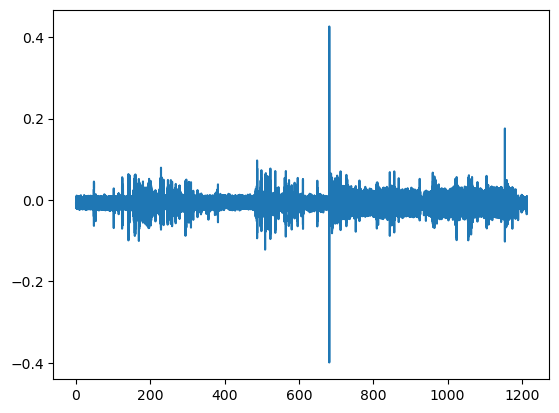

In [11]:
mag1_control = control_channel_1.get_traces(return_scaled=True)[:]

time_control = control_channel_1.get_times()
plt.plot(time_control,mag1_control)

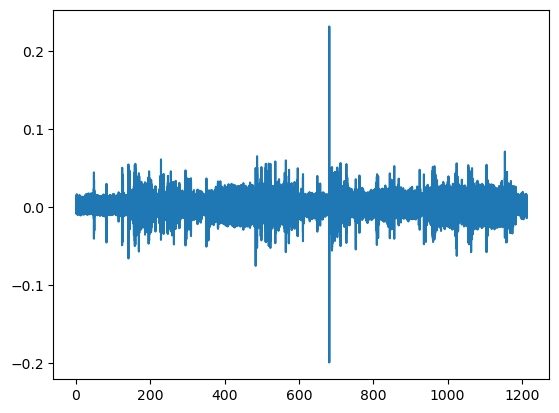

In [12]:
mag2_control = control_channel_2.get_traces(return_scaled=True)[:]

time2_control = control_channel_2.get_times()

plt.plot(time2_control,mag2_control)

In [13]:
#channel slicing for PD group
PD_channel1 = full_raw_PD.channel_slice(channel_ids=['0'])
PD_channel2 = full_raw_PD.channel_slice(channel_ids=['2'])


In [14]:
gains_PD = PD_channel1.get_channel_gains()
PD_channel1.set_channel_gains(gains_PD)

In [15]:
attributefinder(full_raw_PD,"index")

_check_segment_index
block_index
id_to_index
sample_index_to_time
stream_index
time_to_sample_index


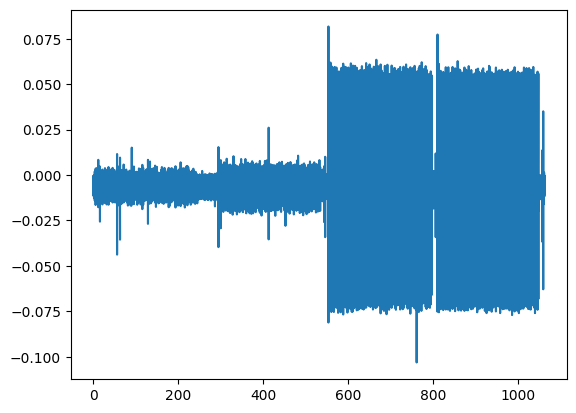

In [ ]:
mag1 = PD_channel1.get_traces(return_scaled=True)[:]

time = PD_channel1.get_times()
plt.plot(time,mag1)


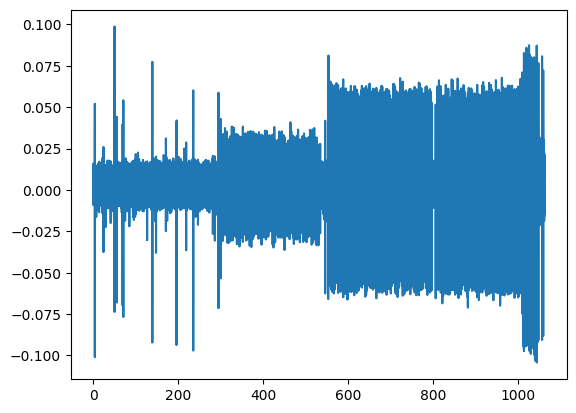

In [ ]:
mag2 = PD_channel2.get_traces(return_scaled=True)[:]

time2 = PD_channel2.get_times()

plt.plot(time2,mag2)


## Creating spike sorting for single channel recording

(<matplotlib.collections.PolyCollection at 0x1c618bcbf50>,
 <matplotlib.collections.PolyCollection at 0x1c618be3910>)

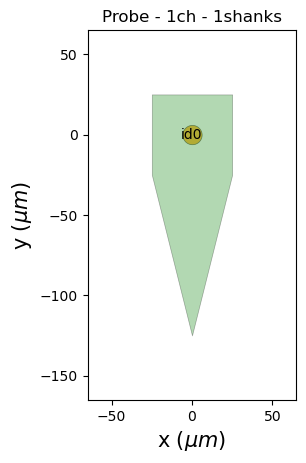

In [16]:
linear_probe_PD = generate_linear_probe(num_elec=1, ypitch=125)
plot_probe(linear_probe_PD, with_contact_id=True)

In [17]:
linear_probe_PD.set_contact_ids(contact_ids=['0'])
linear_probe_PD.set_device_channel_indices(channel_indices=[0])

In [18]:
smr_rec_probe_PDchn1 = PD_channel1.set_probe(linear_probe_PD)

In [33]:
new_params = si.get_default_sorter_params("tridesclous2")
new_params["detection"]["detect_threshold"]=0.000001
new_params["filtering"]["freq_max"] = 7000

In [34]:
from pathlib import Path
base_folder = Path(r"D:\sorting_folder")
sorting_tridesclous2_PD_chn1= si.run_sorter(sorter_name = "tridesclous2", recording=smr_rec_probe_PDchn1, output_folder=base_folder / 'results_tridesclous_PD_channel1.3444557',**new_params)

d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\spikeinterface\preprocessing\normalize_scale.py:303: RuntimeWarning: divide by zero encountered in divide
  gain = 1 / mads
d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\spikeinterface\preprocessing\normalize_scale.py:304: RuntimeWarning: invalid value encountered in divide
  offset = -medians / mads


SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\spikeinterface\sorters\basesorter.py", line 258, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\spikeinterface\sorters\internal\tridesclous2.py", line 160, in _run_from_folder
    tsvd.fit(wfs)
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\sklearn\decomposition\_truncated_svd.py", line 209, in fit
    self.fit_transform(X)
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\sklearn\decomposition\_truncated_svd.py", line 229, in fit_transform
    X = self._validate_data(X, accept_sparse=["csr", "csc"], ensure_min_features=2)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anacondanew1\envs\scientificprogramming\Lib\site-packages\sklearn\utils\validation.py", line 1072, in check_array
    raise ValueError(
ValueError: Found array with 0 sample(s) (shape=(0, 29)) while a minimum of 1 is required by TruncatedSVD.

Spike sorting failed. You can inspect the runtime trace in D:\sorting_folder\results_tridesclous_PD_channel1.3444557/spikeinterface_log.json.

Even changing the version did not do anything, therefore the problem faced might be based on processing single channels.

In [39]:
# function creation

attributefinder(full_raw_PD.neo_reader,"info")

_channel_infos
_global_info


In [7]:
full_raw_PD.neo_reader._channel_infos[1]["title"]

'footshoc'

In [24]:
events = []
for i  in range(len(full_raw_PD.neo_reader._channel_infos)):
    if full_raw_PD.neo_reader._channel_infos[i]["t_start"]>0:
        events.append(full_raw_PD.neo_reader._channel_infos[i]["t_start"])
    else:
        continue

In [25]:
events

[3.2080625,
 2.2499999999999998e-05,
 0.08365,
 0.0412725,
 295.72972749999997,
 3.2053024999999997]

In [46]:
data_loc = r"D:\GIPSA Labwork Internship\spiekee\Spikeme\sourcedata\520\ieeg\520-06.smr"
data_loc2 = r"D:\GIPSA Labwork Internship\spike_interface_primaries\RAWAT\Spikeme\Spikeme\sourcedata\502\ieeg\502-01.smr"

32

In [22]:
def smr_to_bid_events(filename):
    smr_control = Spike2IO(filename)
    smr_control_ex = si.read_spike2(filename)
    block_control = smr_control.read_block(block_index=0,load_waveforms=True)
    times = block_control.segments[0].events[4].times
    sample_list = []
    for triggers in times:
        sample_list.append(smr_control_ex.time_to_sample_index(time_s=triggers))

    return sample_list    

In [23]:
samples_obtained = smr_to_bid_events(data_loc)

ValueError: Unable to convert between units of "dimensionless" and "s"

In [35]:
dir(Spike2IO(data_loc)) 


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_data_blocks',
 '_by_seg_data_blocks',
 '_cache',
 '_channel_infos',
 '_check_stream_signal_channel_characteristics',
 '_count_in_time_slice',
 '_diskblock',
 '_event_count',
 '_generate_minimal_annotations',
 '_get_analogsignal_chunk',
 '_get_channel_indexes',
 '_get_event_timestamps',
 '_get_internal_timestamp_',
 '_get_signal_size',
 '_get_signal_t_start',
 '_get_spike_raw_waveforms',
 '_get_spike_timestamps',
 '_get_stream_index_from_arg',
 '_global_info',
 '_memmap',
 '_parse_header',
 '_prefered_signal_group_mode',
 '_repr_annotations',
 '_rescale_epoch_duration',
 '_rescale_event_timestamp',
 